In [2]:
%matplotlib inline

import pandas as pd

import seaborn as sns

In [3]:
train = pd.read_csv("train.csv", index_col = "PassengerId")

print(train.shape)

train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 1 1)
survived_rate = train["Survived"].mean()
survived_rate = survived_rate *100

print(f"생존률 = {survived_rate:.1f}%")

# 2)
train["Survived"].value_counts()

생존률 = 38.4%


0    549
1    342
Name: Survived, dtype: int64

In [18]:
# 2

# train.loc[train["Survived"] == 0, "Survived(human_read)"] = "Perish"
# train.loc[train["Survived"] == 1, "Survived(human_read)"] = "Survived"

train["Survived(human_read)"] = train["Survived"].replace(0, "Perish").replace(1, "Survived")

print(train.shape)
train[["Survived", "Survived(human_read)"]].head()

(891, 12)


,Survived,Survived(human_read)
PassengerId,,
1,0,Perish
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Perish


(891, 13)


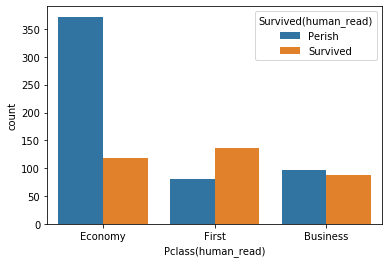

In [26]:
# 3
train["Pclass(human_read)"] = train["Pclass"].replace(1, "First").replace(2, "Business").replace(3, "Economy")

print(train.shape)
train.head()

pd.pivot_table(data = train, index = "Pclass", values = "Survived")
sns.countplot(data = train, x = "Pclass(human_read)", hue = "Survived(human_read)")

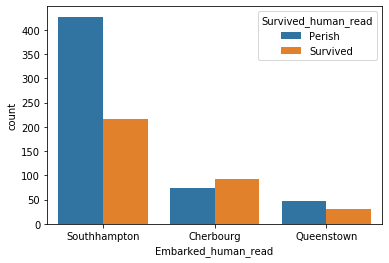

In [46]:
# 4

train.loc[train["Embarked"] == "S", "Embarked_human_read"] = "Southhampton"
train.loc[train["Embarked"] == "C", "Embarked_human_read"] = "Cherbourg"
train.loc[train["Embarked"] == "Q", "Embarked_human_read"] = "Queenstown"

pd.pivot_table(data = train, index = "Embarked_human_read", values = "Survived")

train["Survived_human_read"] = train["Survived(human_read)"]
train = train.drop("Survived(human_read)", axis = "columns")
train.head()

sns.countplot(data = train, x = "Embarked_human_read", hue = "Survived_human_read")

In [42]:
# 5

age_mean = train["Age"].mean()
age_max = train["Age"].max()
age_min = train["Age"].min()

print(f"age_mean: {age_mean:.2f}")
print(f"age_max: {age_max:.2f}")
print(f"age_min: {age_min:.2f}")

age_mean: 29.70
age_max: 80.00
age_min: 0.42


In [58]:
# 6
# pd.pivot_table(data, index = ["지점", "담당"], values = "몸무게", aggfunc = ['mean', 'sum'])
#train["Pcalss_human_read"] = train["Pclass(human_read)"]
#train = train.drop("Pclass(human_read)", axis = "columns")
train.head()

#train["Pclass_human_read"] = train["Pcalss_human_read"]
#train = train.drop("Pcalss_human_read", axis = "columns")

pd.pivot_table(train, index = "Pclass_human_read", values = "Age", aggfunc = ['mean'])

,mean
,Age
Pclass_human_read,
Business,29.877630
Economy,25.140620
First,38.233441


In [73]:
# 7

train.loc[train["Age"] < 15, "Age_type"] = "Young"
train.loc[(train["Age"] >= 15) & (train["Age"] < 30), "Age_type"] = "Medium" 
train.loc[train["Age"] >= 30, "Age_type"] = "Old" 

train[["Age", "Age_type"]].head()

,Age,Age_type
PassengerId,,
1,22.0,Medium
2,38.0,Old
3,26.0,Medium
4,35.0,Old
5,35.0,Old


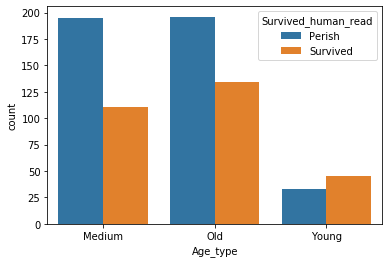

In [94]:
survived_young = train[train["Age_type"] == "Young"]

survived_rate_young = survived_young["Survived"].mean()

survived_rate_young*100

sns.countplot(data = train, x = "Age_type", hue = "Survived_human_read")

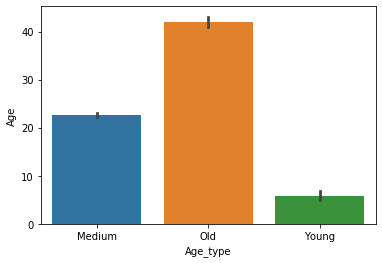

In [93]:
sns.barplot(data = train, x = "Age_type", y = "Age")

# Q. 위 표와 같은 라인에 그리려면 어떻게 해야 하나요?

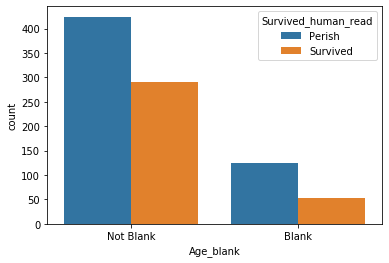

In [114]:
# 8

train.loc[train["Age"].isnull(), "Age_blank"] = "Blank"
train.loc[train["Age"].notnull(), "Age_blank"] = "Not Blank"

#train[["Age", "Age_blank"]]

sns.countplot(data = train, x = "Age_blank", hue = "Survived_human_read")

In [115]:
# 9

#survived_young = train[train["Age_type"] == "Young"]

#survived_rate_young = survived_young["Survived"].mean()